In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('gld_price_data.csv')
df.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.shape

(2290, 6)

In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
for  col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Date
['1/2/2008' '1/3/2008' '1/4/2008' ... '5/10/2018' '5/14/2018' '5/16/2018']


In [14]:
#finding missing values
features_na=[features for features in df.columns if df[features].isnull().sum()>0]
for feature in features_na:
      print(feature,np.round(df[feature].isnull().mean(),4),'missing values')
else:
        print('no missing values present')

no missing values present


In [17]:
#finding features with one value
for column in df.columns:
    print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [25]:
#exploring data features 
categorical_features=[feature for feature in df.columns if((df[feature].dtypes=='0') &(feature not in ['GLD']))]
categorical_features


[]

In [26]:
for feature in categorical_features:
    print('features is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

In [27]:
#explore the numerical values
numerical_features=[feature for feature in df.columns if((df[feature].dtype!='0')&(feature not in['GLD']))]
print('NUmber of numerical variables :',len(numerical_features))
df[numerical_features].head()

NUmber of numerical variables : 5


,Date,SPX,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,76.059998,15.590,1.557099


In [32]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete variables Count:{}".format(len(discrete_feature)))

Discrete variables Count:0


In [33]:
continuous_features=[feature for feature in numerical_features  if feature not in discrete_feature+['GLD']]
print("Continuous feature count{}".format(len(continuous_features)))

Continuous feature count5


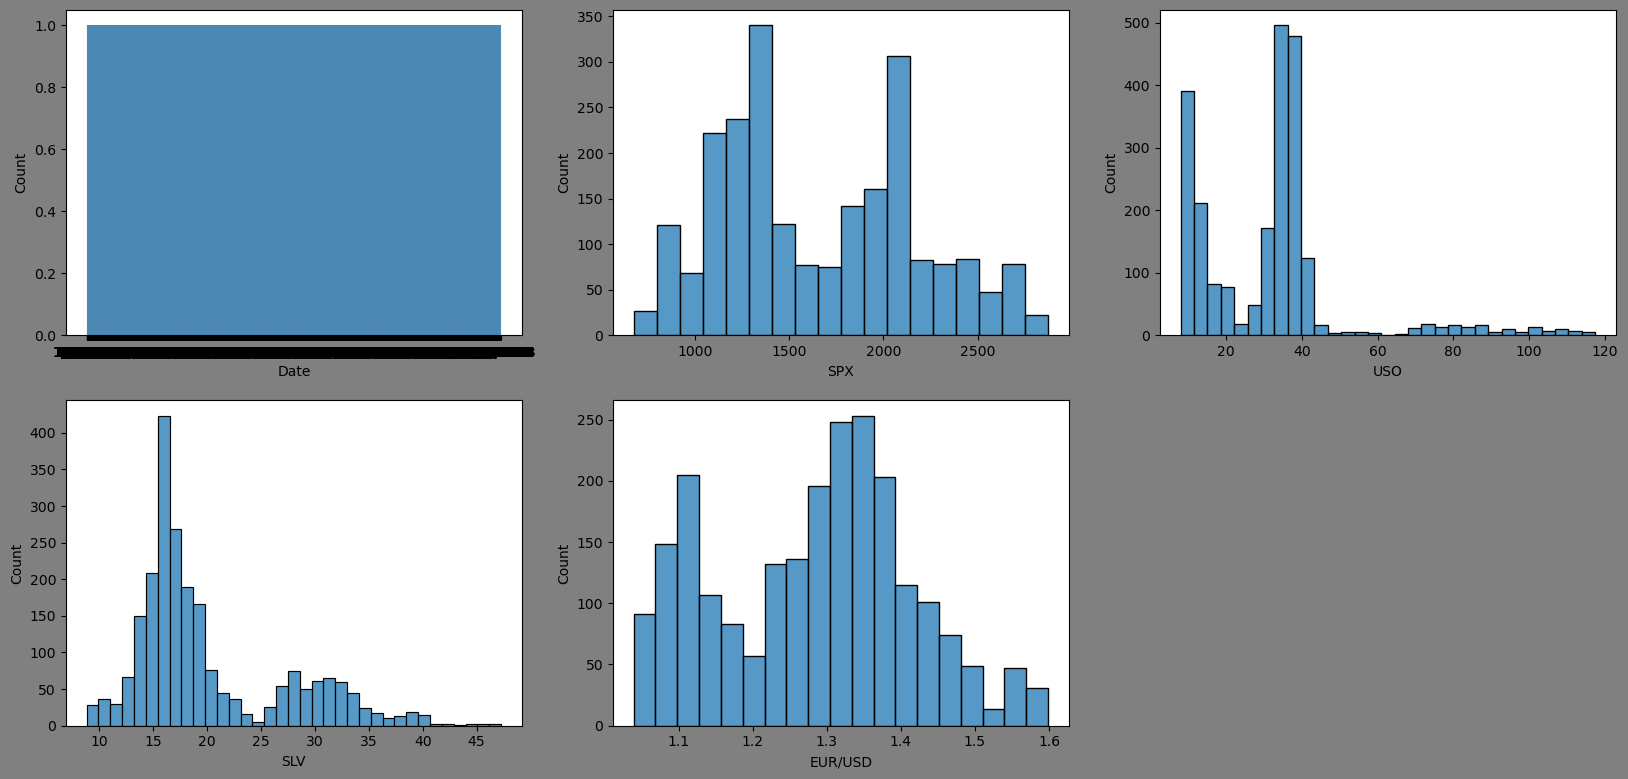

In [42]:
#plot a univarite distribution of continious observations
plt.figure(figsize=(20,60),facecolor='grey')
plotnumber=1
for continuous_feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.histplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

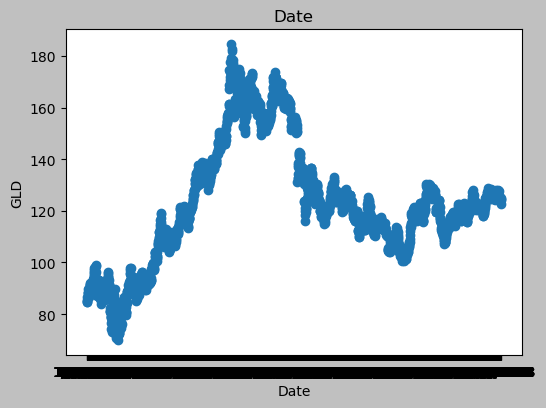

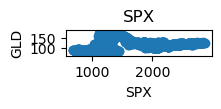

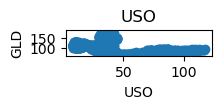

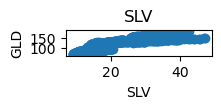

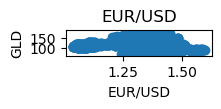

In [45]:
#relation between Continuous numerical features and labels
plt.figure(figsize=(20,60),facecolor='silver')
plotnumber=1
for feature in continuous_features:
    data=df.copy()
    ax=plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
    plotnumber=1
    plt.show()

C:\Users\akash.kale\AppData\Local\Temp\ipykernel_7180\759535705.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df.corr()


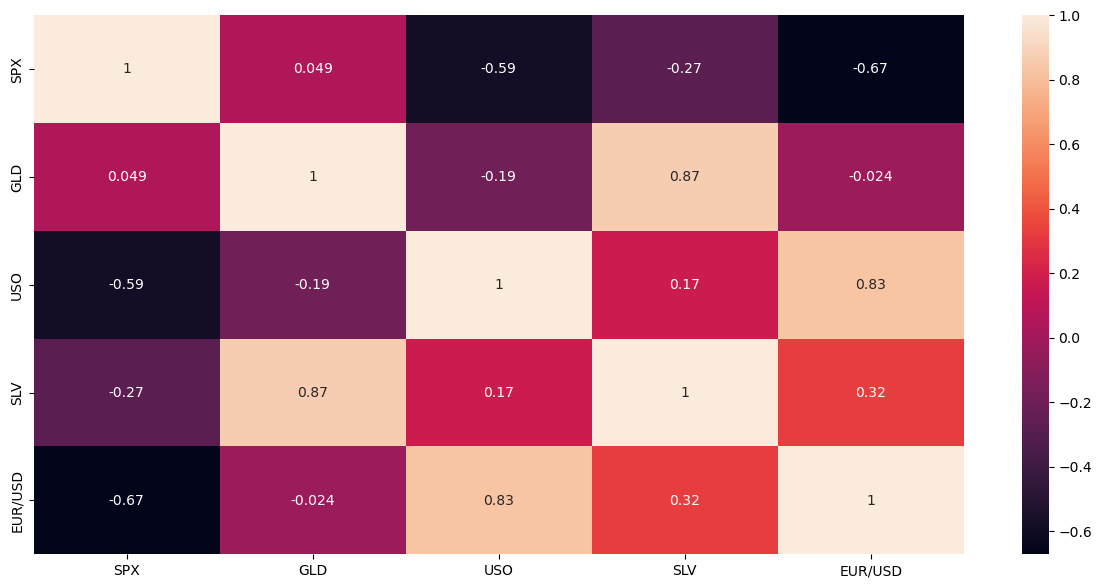

In [5]:
#checking for correlation 
cor_mat=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()

In [7]:
print(cor_mat['GLD'].sort_values(ascending=False),'\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



In [8]:
df2=df.copy()

In [9]:
df2.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
#drop date
df2.drop(['Date'],axis=1,inplace=True)

In [12]:
X=df2.drop(['GLD'],axis=1)
y=df2['GLD']
from sklearn .model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
len(X_test)

458

In [14]:
len(X_train)

1832

In [15]:
X_train

,SPX,USO,SLV,EUR/USD
486,1165.810059,39.560001,16.600000,1.356705
31,1349.989990,75.930000,16.952000,1.467610
1754,2041.890015,10.740000,13.080000,1.087453
1490,1862.760010,31.100000,16.670000,1.280442
1526,2026.140015,23.280001,16.370001,1.239495
...,...,...,...,...
1033,1461.050049,34.119999,33.570000,1.305824
1731,2023.040039,13.060000,13.590000,1.081502
763,1283.500000,36.009998,34.369999,1.427002
835,1218.280029,35.200001,32.330002,1.386001


In [17]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
Y_pred = model_SVR.predict(X_test)
 
print(mean_absolute_percentage_error(y_test, Y_pred))

0.13164228845772663
